# Demo for plotting subgraphs

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

### Load in information about the full network so we can demonstrate advanced features


In [2]:
load_dir = Path('../../metapaths/2_pipeline').resolve()

nw_dir = load_dir.joinpath('10_Semmantic_Compression', 'out')
hyp_dir = load_dir.joinpath('11c_Model_Prep_Hyperparam_tuning', 'out')

In [3]:
nodes = pd.read_csv(nw_dir.joinpath('nodes_biolink.csv'), dtype=str)
edges = pd.read_csv(nw_dir.joinpath('edges_biolink.csv'), dtype=str)

In [4]:
id_to_label = nodes.set_index('id')['label'].to_dict()

In [5]:
edge_info = pd.read_csv(load_dir.parent.joinpath('0_data/manual/edge_semtypes.csv'))
inv_map = edge_info.set_index('fwd_edge')['rev_edge'].to_dict()

In [6]:
from data_tools.graphs import dataframes_to_metagraph
metagraph = dataframes_to_metagraph(nodes, edges)

metapaths = pd.read_csv(hyp_dir.joinpath('kept_features.txt'), header=None)[0].tolist()

all_metapaths = metagraph.extract_metapaths('ChemicalSubstance', 'Disease', 4)
mp_info = {mp.abbrev: mp for mp in all_metapaths if mp.abbrev in metapaths}

/home/mmayers/software/miniconda3/envs/ml/lib/python3.7/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Load information on the paths we wish to plot

In [7]:
test_path = pd.read_csv('paths_CHEBI:135990_DOID:1470.csv', 
                        converters={'nodes': eval, 'node_ids': eval, 'node_id_tup': eval})
test_path.head()

metapath    metric                                           node_ids  \
0  CafGpoPWpoCtD  0.000017  [CHEBI:135990, NCBIGene:1813, WP:WP4222, CHEBI...   
1    CafGmPmGawD  0.000026  [CHEBI:135990, NCBIGene:1813, HP:0007018, NCBI...   
2   CafGrBPrGawD  0.000029  [CHEBI:135990, NCBIGene:1813, GO:0006813, NCBI...   
3   CaGpoPWpoCtD  0.000002  [CHEBI:135990, NCBIGene:3350, WP:WP706, CHEBI:...   
4     CaGpoPWawD  0.000038  [CHEBI:135990, NCBIGene:3350, REACT:R-HSA-3906...   

                                               nodes  model_metric  \
0  [gepirone, DRD2, Phosphodiesterases in neurona...      0.640224   
1  [gepirone, DRD2, Attention deficit hyperactivi...      0.215241   
2  [gepirone, DRD2, potassium ion transport, ANK3...      0.175550   
3  [gepirone, HTR1A, Sudden Infant Death Syndrome...      0.145041   
4  [gepirone, HTR1A, Serotonin receptors, major d...      0.142978   

   std_metric                                        node_id_tup  
0    0.052316  (CHEBI:135990, NCBIGene:1813, WP:WP4222, CHEBI...  
1    0.013212  (CHEBI:135990, NCBIGene:1813, HP:0007018, NCBI...  
2    0.009606  (CHEBI:135990, NCBIGene:1813, GO:0006813, NCBI...  
3    0.009782  (CHEBI:135990, NCBIGene:3350, WP:WP706, CHEBI:...  
4    0.009798  (CHEBI:135990, NCBIGene:3350, REACT:R-HSA-3906...

In [8]:
top_10_rows = test_path.head(10)

In [9]:
%matplotlib inline
from data_tools import plotting as dtp

## Simple list of paths

In [10]:
paths = [['CML', 'BCR', 'imatinib'],
 ['CML', 'ABL1', 'imatinib'],
 ['CML', 'KIT', 'imatinib'],
 ['CML', 'C1704799', 'imatinib'],
 ['CML', 'MTTP', 'imatinib'],
 ['CML', 'C1704928', 'imatinib'],
 ['CML', 'AKT1', 'imatinib'],
 ['CML', 'TP53', 'imatinib'],
 ['CML', 'C1705526', 'imatinib'],
 ['CML', 'ABCB1', 'imatinib']]

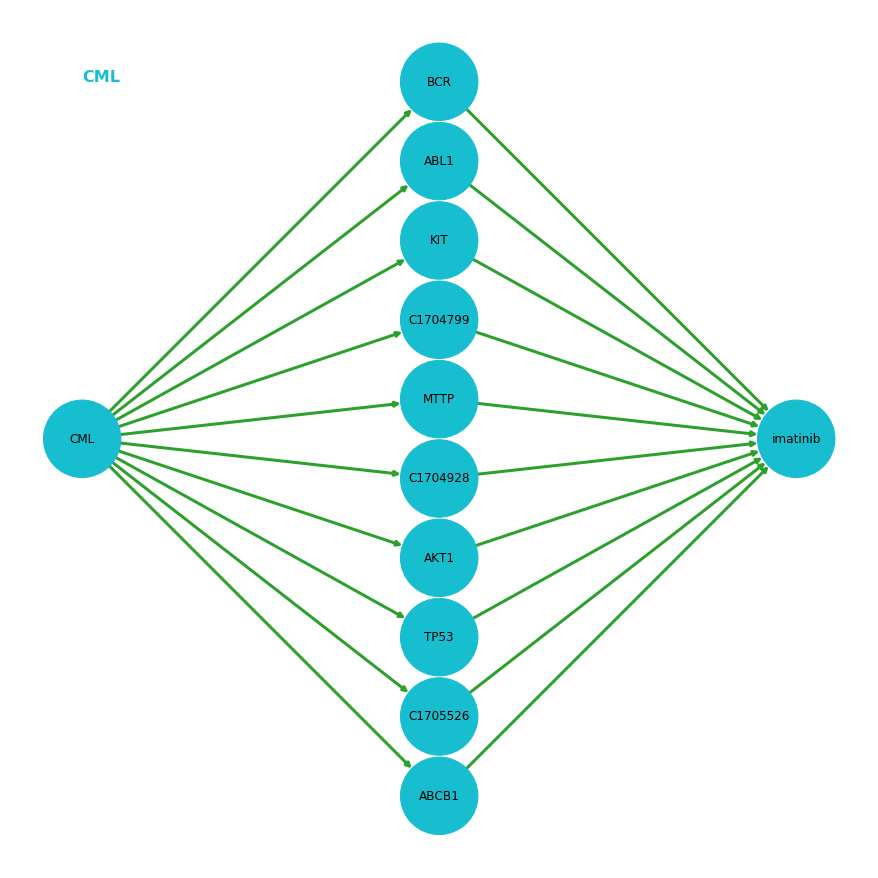

In [11]:
### NETWORKX and matplotlib throw a lot of warnings... Suppresing them for now, 
### hopfully future versioning will fix this without having to modify code too much
import warnings
warnings.simplefilter('ignore')

G = dtp.build_explanitory_graph(paths)
dtp.draw_explanitory_graph(G);

### Remove title from path

If you don't want the starting node's name, simply remove it with the `title=False` flag.

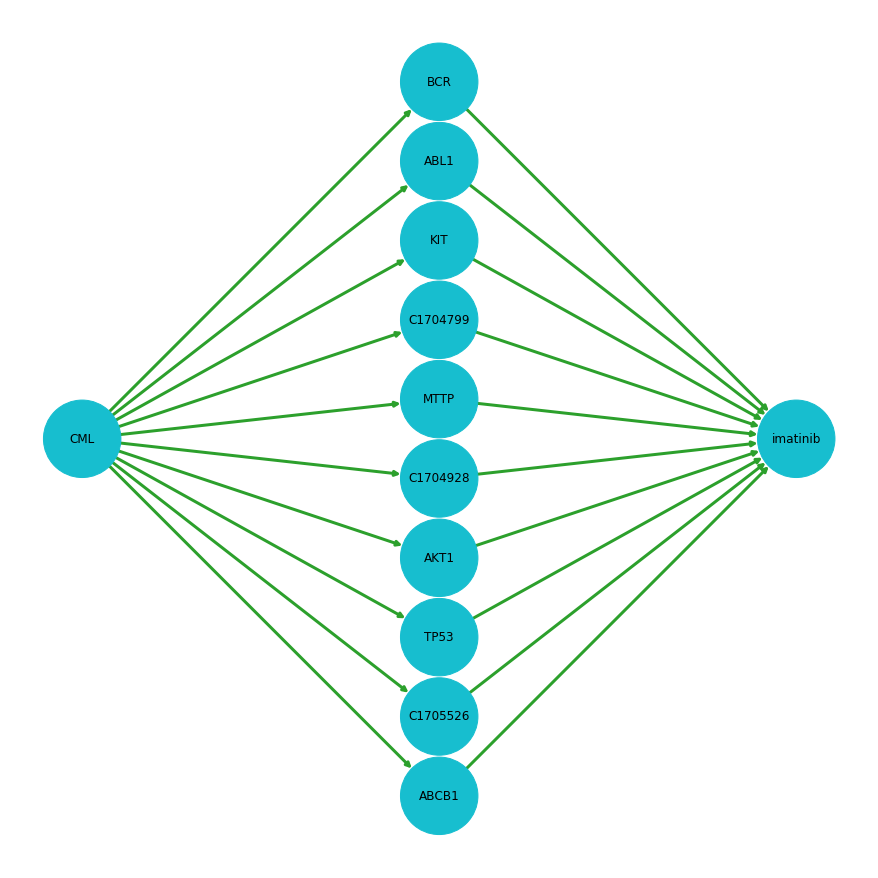

In [12]:
### NETWORKX and matplotlib throw a lot of warnings... Suppresing them for now, 
### hopfully future versioning will fix this without having to modify code too much
import warnings
warnings.simplefilter('ignore')

G = dtp.build_explanitory_graph(paths)
dtp.draw_explanitory_graph(G, title=False);

## Build from a list of paths

In [13]:
list_of_paths = top_10_rows['node_ids'].tolist()
list_of_paths

[['CHEBI:135990', 'NCBIGene:1813', 'WP:WP4222', 'CHEBI:59540', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:1813', 'HP:0007018', 'NCBIGene:2917', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:1813', 'GO:0006813', 'NCBIGene:288', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:3350', 'WP:WP706', 'CHEBI:86990', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:3350', 'REACT:R-HSA-390666', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:3350', 'GO:0051378', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:3350', 'GO:0014062', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:3350', 'WP:WP706', 'CHEBI:58266', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:3350', 'HP:0002322', 'MESH:C492572', 'DOID:1470'],
 ['CHEBI:135990', 'NCBIGene:3350', 'HP:0002080', 'MESH:C492572', 'DOID:1470']]

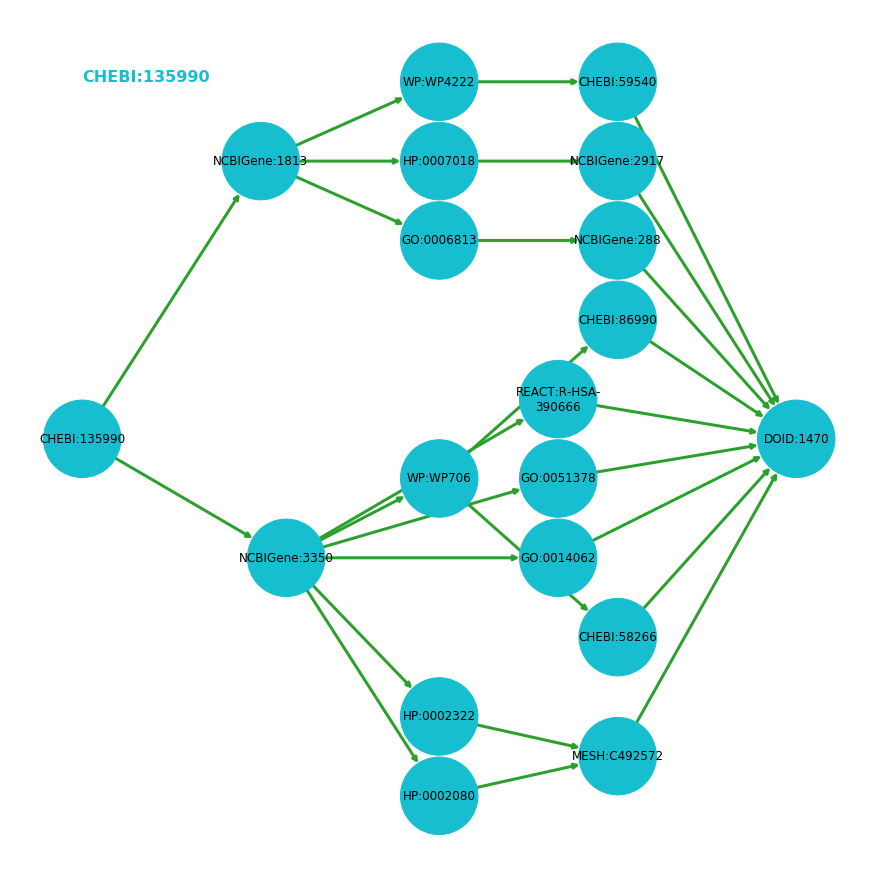

In [14]:
G = dtp.build_explanitory_graph(list_of_paths)
dtp.draw_explanitory_graph(G);

## Add a list of edges

Adding a list of edges wen building the graph will result in annotations

The function `parse_metapath_to_edge_name` can produce the edge names from a metapath abbreviation, but metapath info of type `hetnetpy.hetnet.MetaPath` is required (see cell 6). An optinal inversion map will change names if the edge is inverted... e.g. `has_part` becomes `part_of` when the edge is inverted.

## Simple list of paths

In [15]:
# Get the edge names
list_of_edges = []
for mp in top_10_rows['metapath']:
    list_of_edges.append(dtp.parse_metapath_to_edge_names(mp, mp_info, inv_map))
list_of_edges

[['affects', 'part_of', 'has_part', 'treats'],
 ['affects', 'marker_or_mechanism', 'marked_by', 'associated_with'],
 ['affects', 'regulates', 'regulated_by', 'associated_with'],
 ['activates', 'part_of', 'has_part', 'treats'],
 ['activates', 'part_of', 'associated_with'],
 ['activates', 'enables', 'associated_with'],
 ['activates', 'involved_in', 'associated_with'],
 ['activates', 'part_of', 'has_part', 'treats'],
 ['activates', 'marker_or_mechanism', 'marked_by', 'treats'],
 ['activates', 'marker_or_mechanism', 'marked_by', 'treats']]

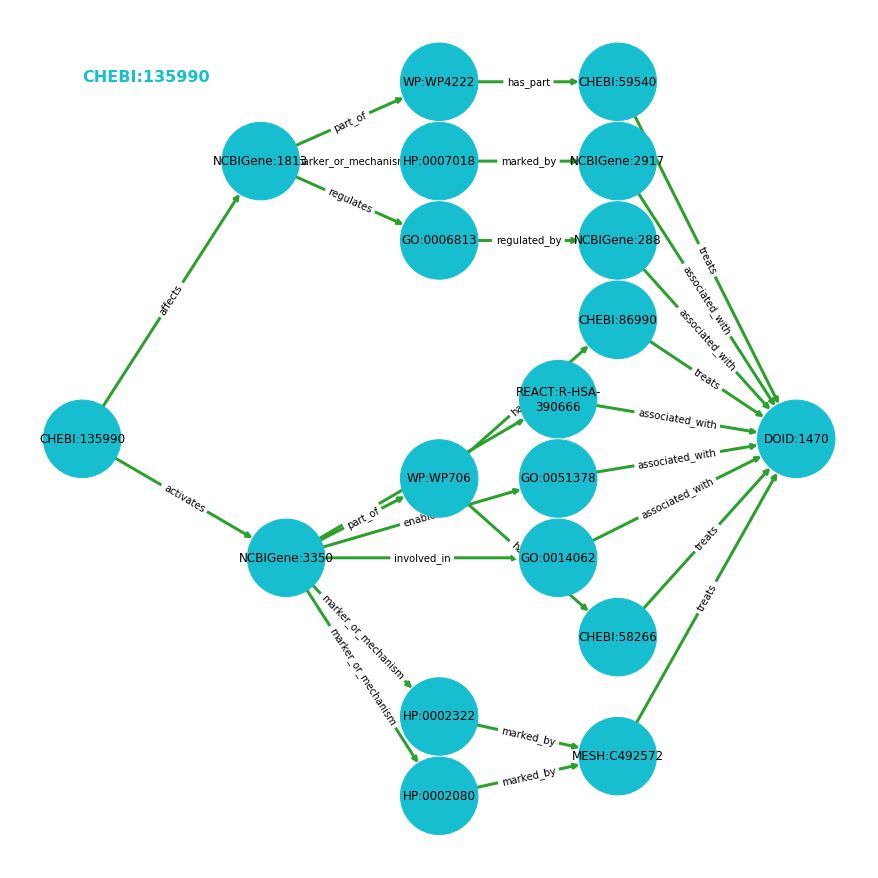

In [16]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges)
dtp.draw_explanitory_graph(G);

## Map from identifer to name

Adding this to the draw function will have node names written in place of identifiers

In [17]:
id_to_name = nodes.set_index('id')['name'].to_dict()
id_to_name['CHEBI:135990'], id_to_name['GO:0006813'], id_to_name['DOID:1470']

('gepirone', 'potassium ion transport', 'major depressive disorder')

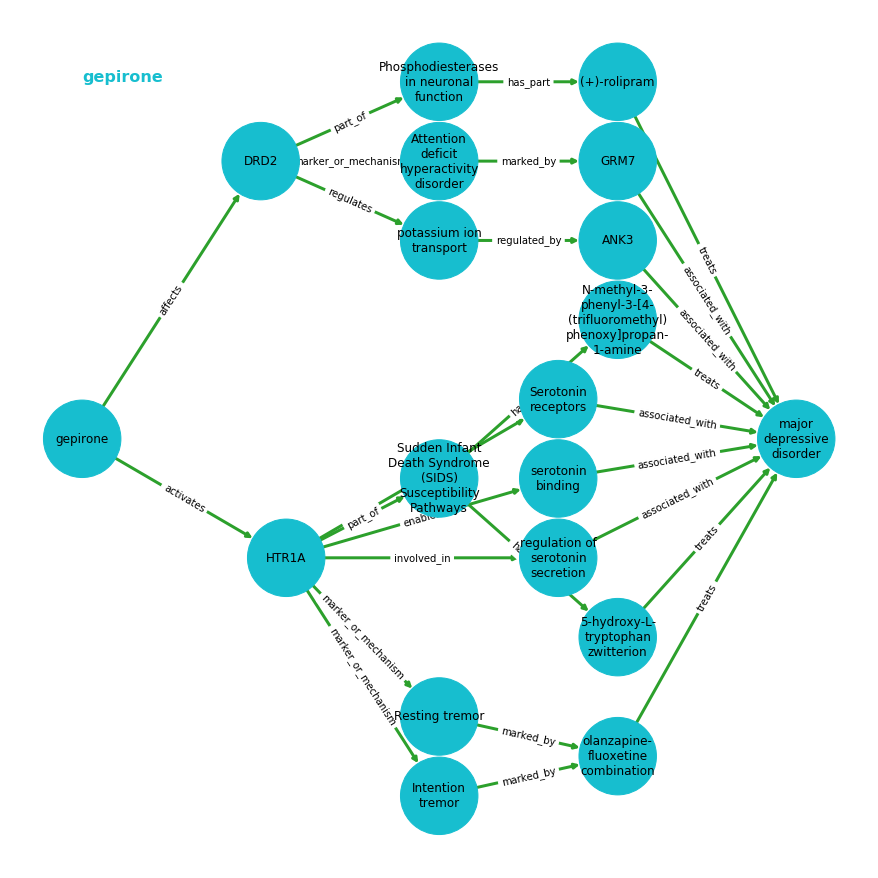

In [18]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges) # Keep the edge labels
dtp.draw_explanitory_graph(G, id_to_name);

## Path weights

Weights for each path will change edge thickness

In [19]:
path_weights = top_10_rows['model_metric'].tolist()
path_weights

[0.6402238388010566,
 0.2152409762979889,
 0.17554950102121633,
 0.1450408127370994,
 0.14297846181755294,
 0.1288928716657668,
 0.08761738763310642,
 0.08566731994172735,
 0.07244747683365106,
 0.07244747683365106]

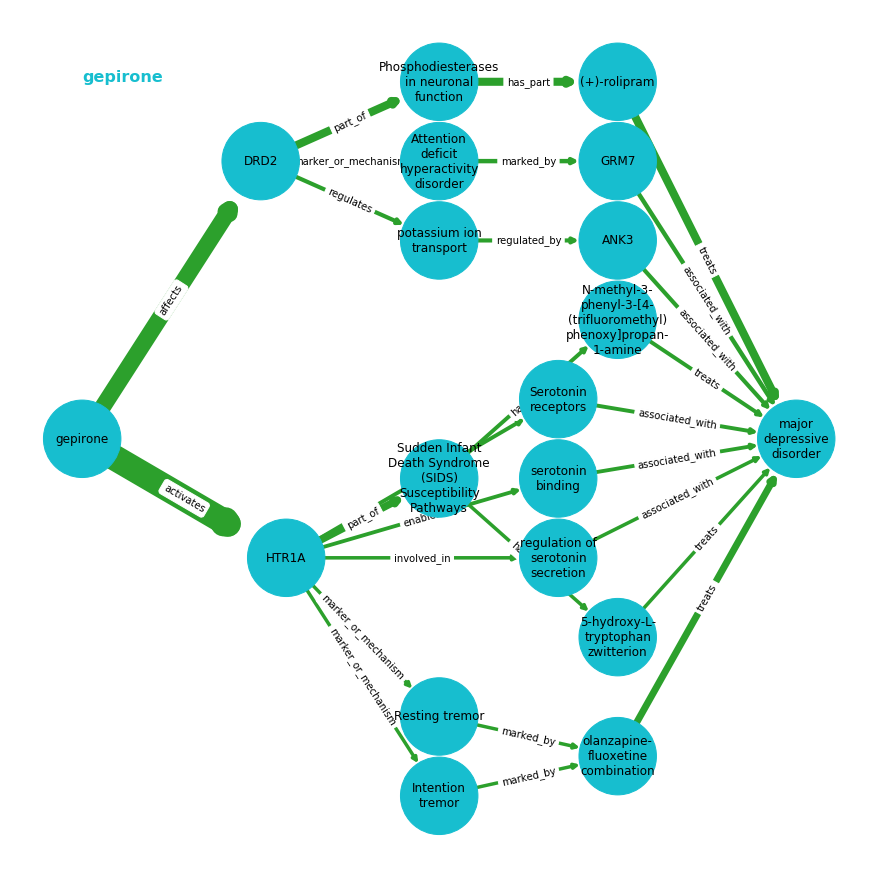

In [20]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights)
dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name);

## Customize your edge weights 

### Need to fix bug... 

currently not working with triple-key edge_weights (start_id, end_id, label)... only dual key.

In [21]:
edge_tuples = []
for p in list_of_paths:
    for i in range(len(p)-1):
        edge_tuples.append((p[i], p[i+1]))
edge_tuples = set(edge_tuples)

# Build an edge id to weight map
edge_weights = {et: (1+np.random.random())**2 for et in edge_tuples}

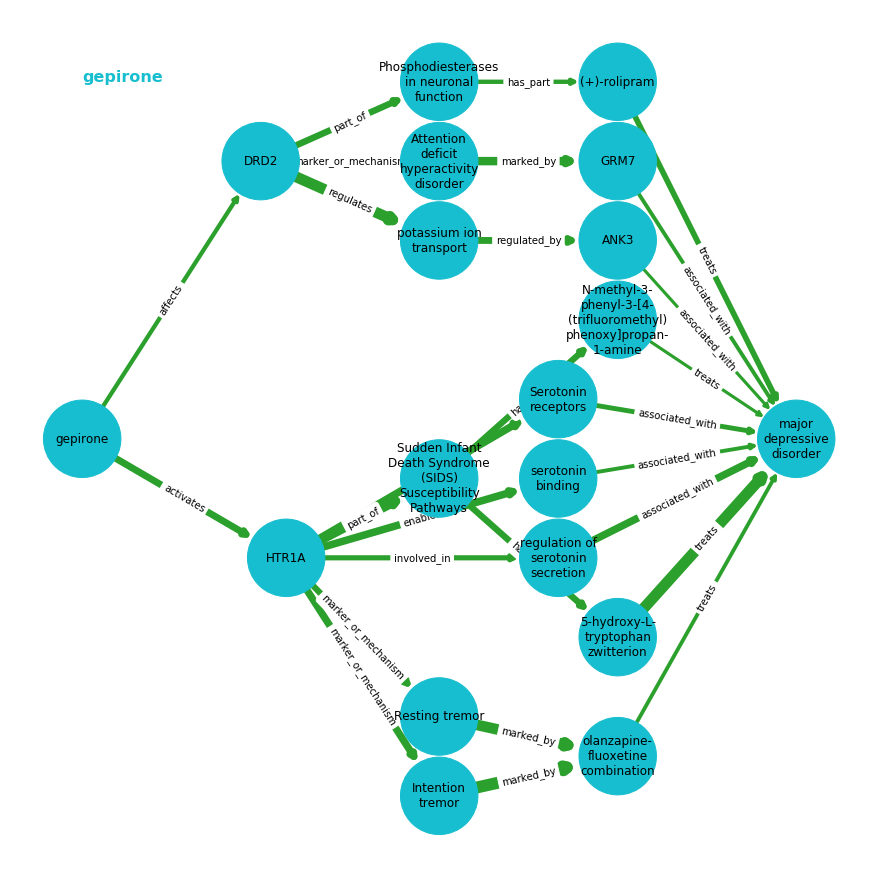

In [22]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, edge_weights=edge_weights)
dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name);

## Color by node type

A map from node identifier to node type (or label) will result in coloring by type

Coloring in this fashion can be altered with seaborns `.set_palette()` method.

In [23]:
id_to_label = nodes.set_index('id')['label'].to_dict()
id_to_label['CHEBI:135990'], id_to_label['GO:0006813'], id_to_label['DOID:1470']

('ChemicalSubstance', 'BiologicalProcessOrActivity', 'Disease')

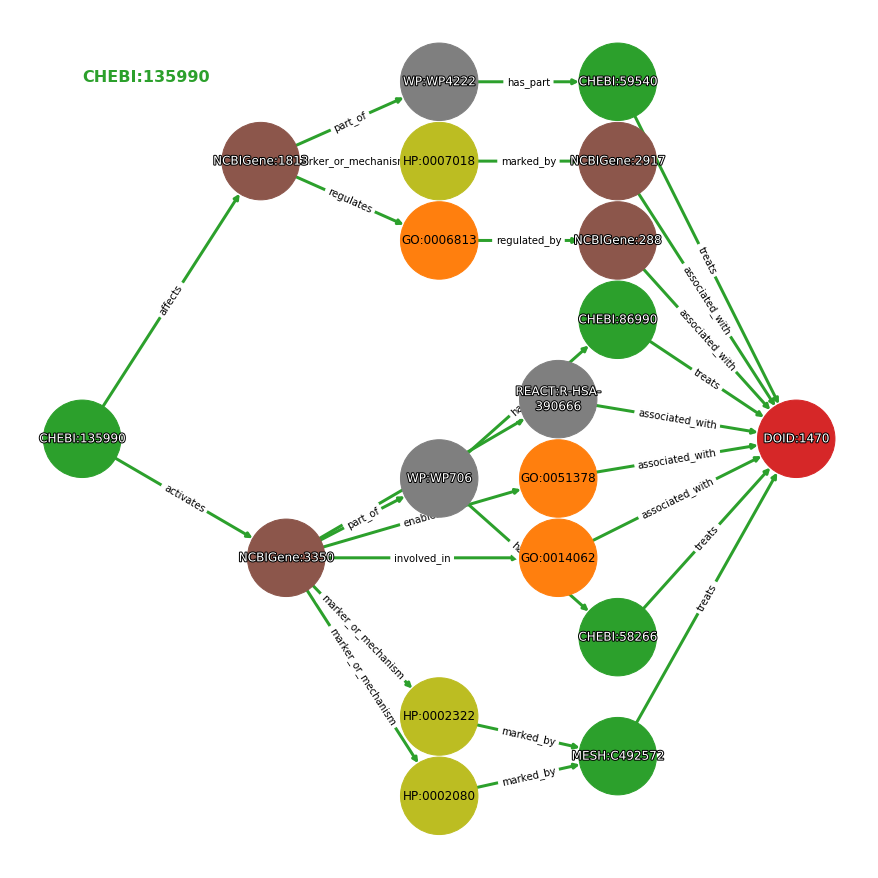

In [24]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, node_id_to_label=id_to_label)
dtp.draw_explanitory_graph(G);

## Customize node colors

A mapper from node id to color (only tested hex colors) will color nodes as desired

In [25]:
# Choose custom node colors
node_color_map = {'AnatomicalEntity': '#5252b9',
                'BiologicalProcessOrActivity': '#fc99d5',
                'MacromolecularMachine': '#d032a3',
                'Disease': '#50e316',
                'Pathway': '#b7d165',
                'PhenotypicFeature': '#165f28',
                'GeneFamily': '#6404b7',
                'PhysiologicalProcess': '#ec102f',
                'OrganismTaxon': '#e9bf98',
                'ChemicalSubstance': '#21f0b6'}

node_id_to_color = nodes.set_index('id')['label'].map(node_color_map).to_dict()

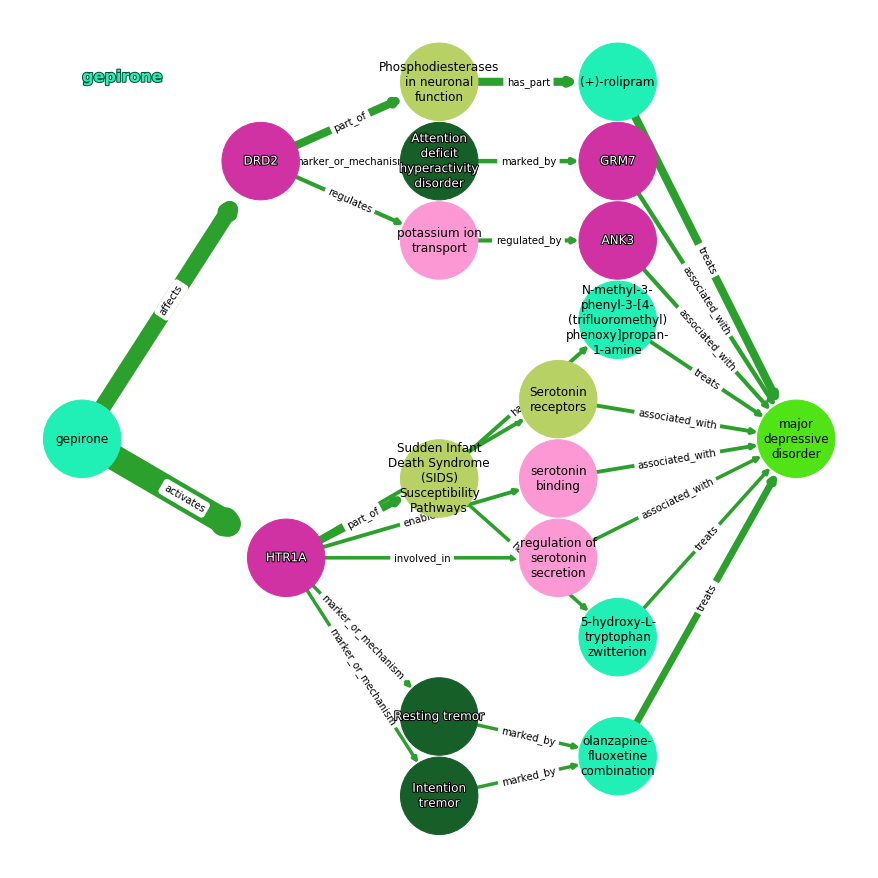

In [26]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name);

## Highlight a single path in a different color

The function `highlight_path_of_interest` will define colors for for the edges to highlight a path

In [27]:
# Pick a path to highlight
path_of_interest = top_10_rows.loc[3, 'node_ids']
path_of_interest

['CHEBI:135990', 'NCBIGene:3350', 'WP:WP706', 'CHEBI:86990', 'DOID:1470']

In [28]:
edge_color_map = dtp.highlight_path_of_interest(list_of_paths, path_of_interest)
edge_color_map

{('CHEBI:135990', 'NCBIGene:1813'): '#2ca02c',
 ('CHEBI:135990', 'NCBIGene:3350'): '#ff7f0e',
 ('CHEBI:58266', 'DOID:1470'): '#2ca02c',
 ('CHEBI:59540', 'DOID:1470'): '#2ca02c',
 ('CHEBI:86990', 'DOID:1470'): '#ff7f0e',
 ('GO:0006813', 'NCBIGene:288'): '#2ca02c',
 ('GO:0014062', 'DOID:1470'): '#2ca02c',
 ('GO:0051378', 'DOID:1470'): '#2ca02c',
 ('HP:0002080', 'MESH:C492572'): '#2ca02c',
 ('HP:0002322', 'MESH:C492572'): '#2ca02c',
 ('HP:0007018', 'NCBIGene:2917'): '#2ca02c',
 ('MESH:C492572', 'DOID:1470'): '#2ca02c',
 ('NCBIGene:1813', 'GO:0006813'): '#2ca02c',
 ('NCBIGene:1813', 'HP:0007018'): '#2ca02c',
 ('NCBIGene:1813', 'WP:WP4222'): '#2ca02c',
 ('NCBIGene:288', 'DOID:1470'): '#2ca02c',
 ('NCBIGene:2917', 'DOID:1470'): '#2ca02c',
 ('NCBIGene:3350', 'GO:0014062'): '#2ca02c',
 ('NCBIGene:3350', 'GO:0051378'): '#2ca02c',
 ('NCBIGene:3350', 'HP:0002080'): '#2ca02c',
 ('NCBIGene:3350', 'HP:0002322'): '#2ca02c',
 ('NCBIGene:3350', 'REACT:R-HSA-390666'): '#2ca02c',
 ('NCBIGene:3350', 'WP:W

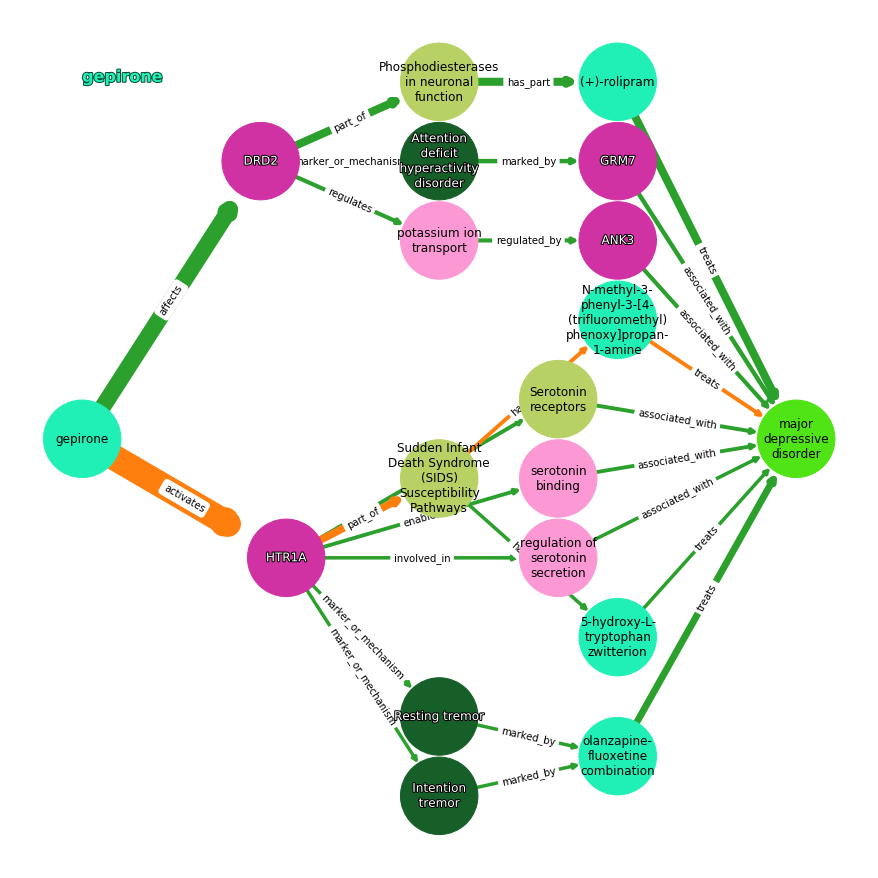

In [29]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=edge_color_map)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name);

## Custom edge colors

In [30]:
import seaborn as sns

def get_random_hex_color():
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    
    return sns.color_palette([(r, g, b)]).as_hex()[0]

In [31]:
random_edge_colors = {k: get_random_hex_color() for k in edge_color_map.keys()}

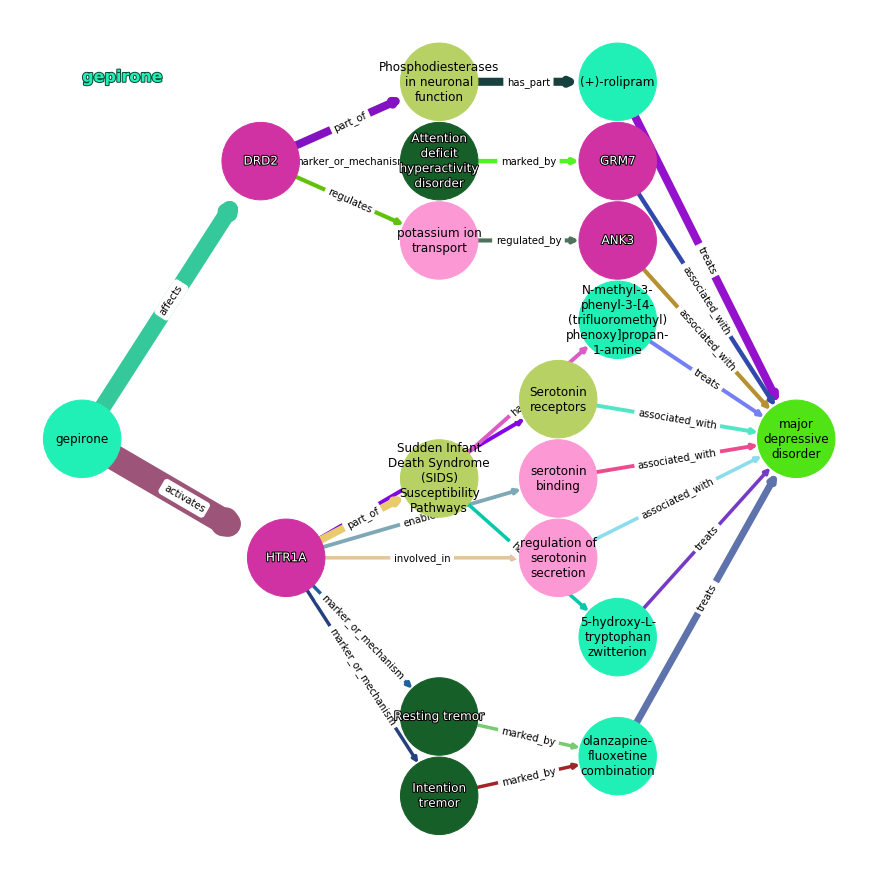

In [32]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=random_edge_colors)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name);

## Add a probability to the title

As these graphs are based off of repruposing predctions, the overall probability of the prediction may be of interest.
It can be added with the draw function and appears next to the drug name.

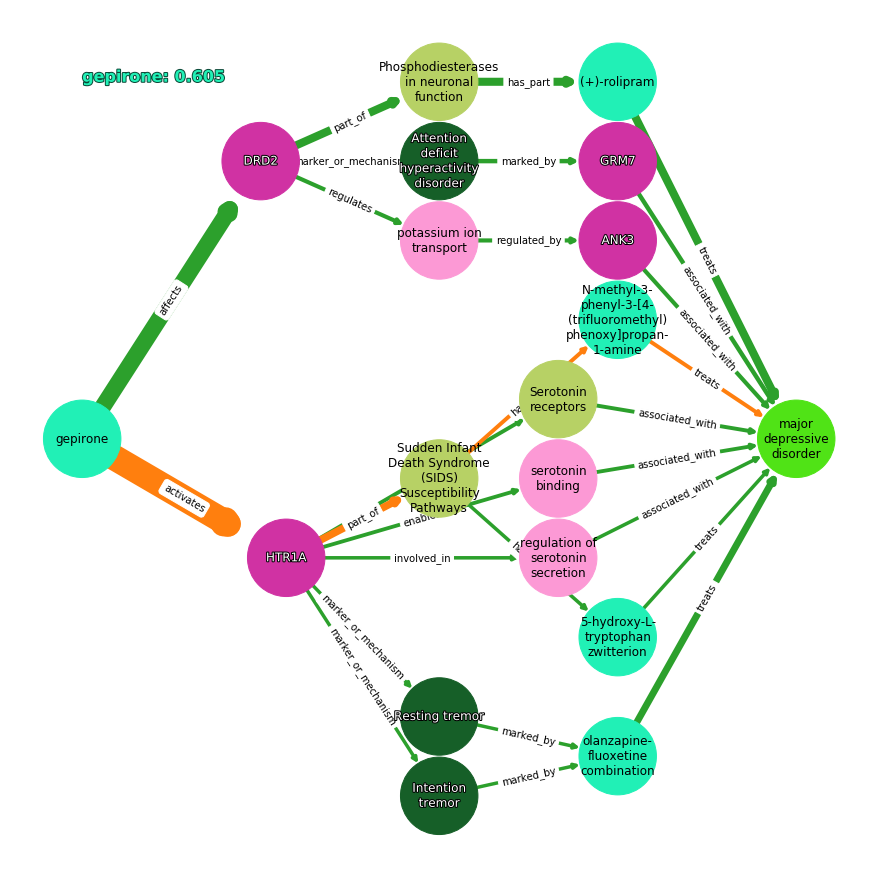

In [33]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=edge_color_map)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name, proba=.6051);

## Scaling size

This feature was built around 10 or fewer paths, all starting and ending on the same node. However, it should scale with more paths... but is not guarnteed to be as good looking.


The `n_paths` argument in the draw function helps scale the final figure height to give room for extra nodes. Keeping the value consistant with the number of paths will guarentee that nodes are non-overlapping, but smaller values may be better produce a more compact figure and reduce empty space.

In [34]:
top_20_rows = test_path.head(20)

list_of_paths = top_20_rows['node_ids'].tolist()

list_of_edges = []
for mp in top_20_rows['metapath']:
    list_of_edges.append(dtp.parse_metapath_to_edge_names(mp, mp_info, inv_map))
list_of_edges

path_weights = top_20_rows['model_metric'].tolist()

# We will have more edges, so rebuild the color map
edge_color_map = dtp.highlight_path_of_interest(list_of_paths, path_of_interest)

### n_paths = 10 

With 20 paths passed, using `n_paths=10` produces a quite compact result, many nodes overlapping.

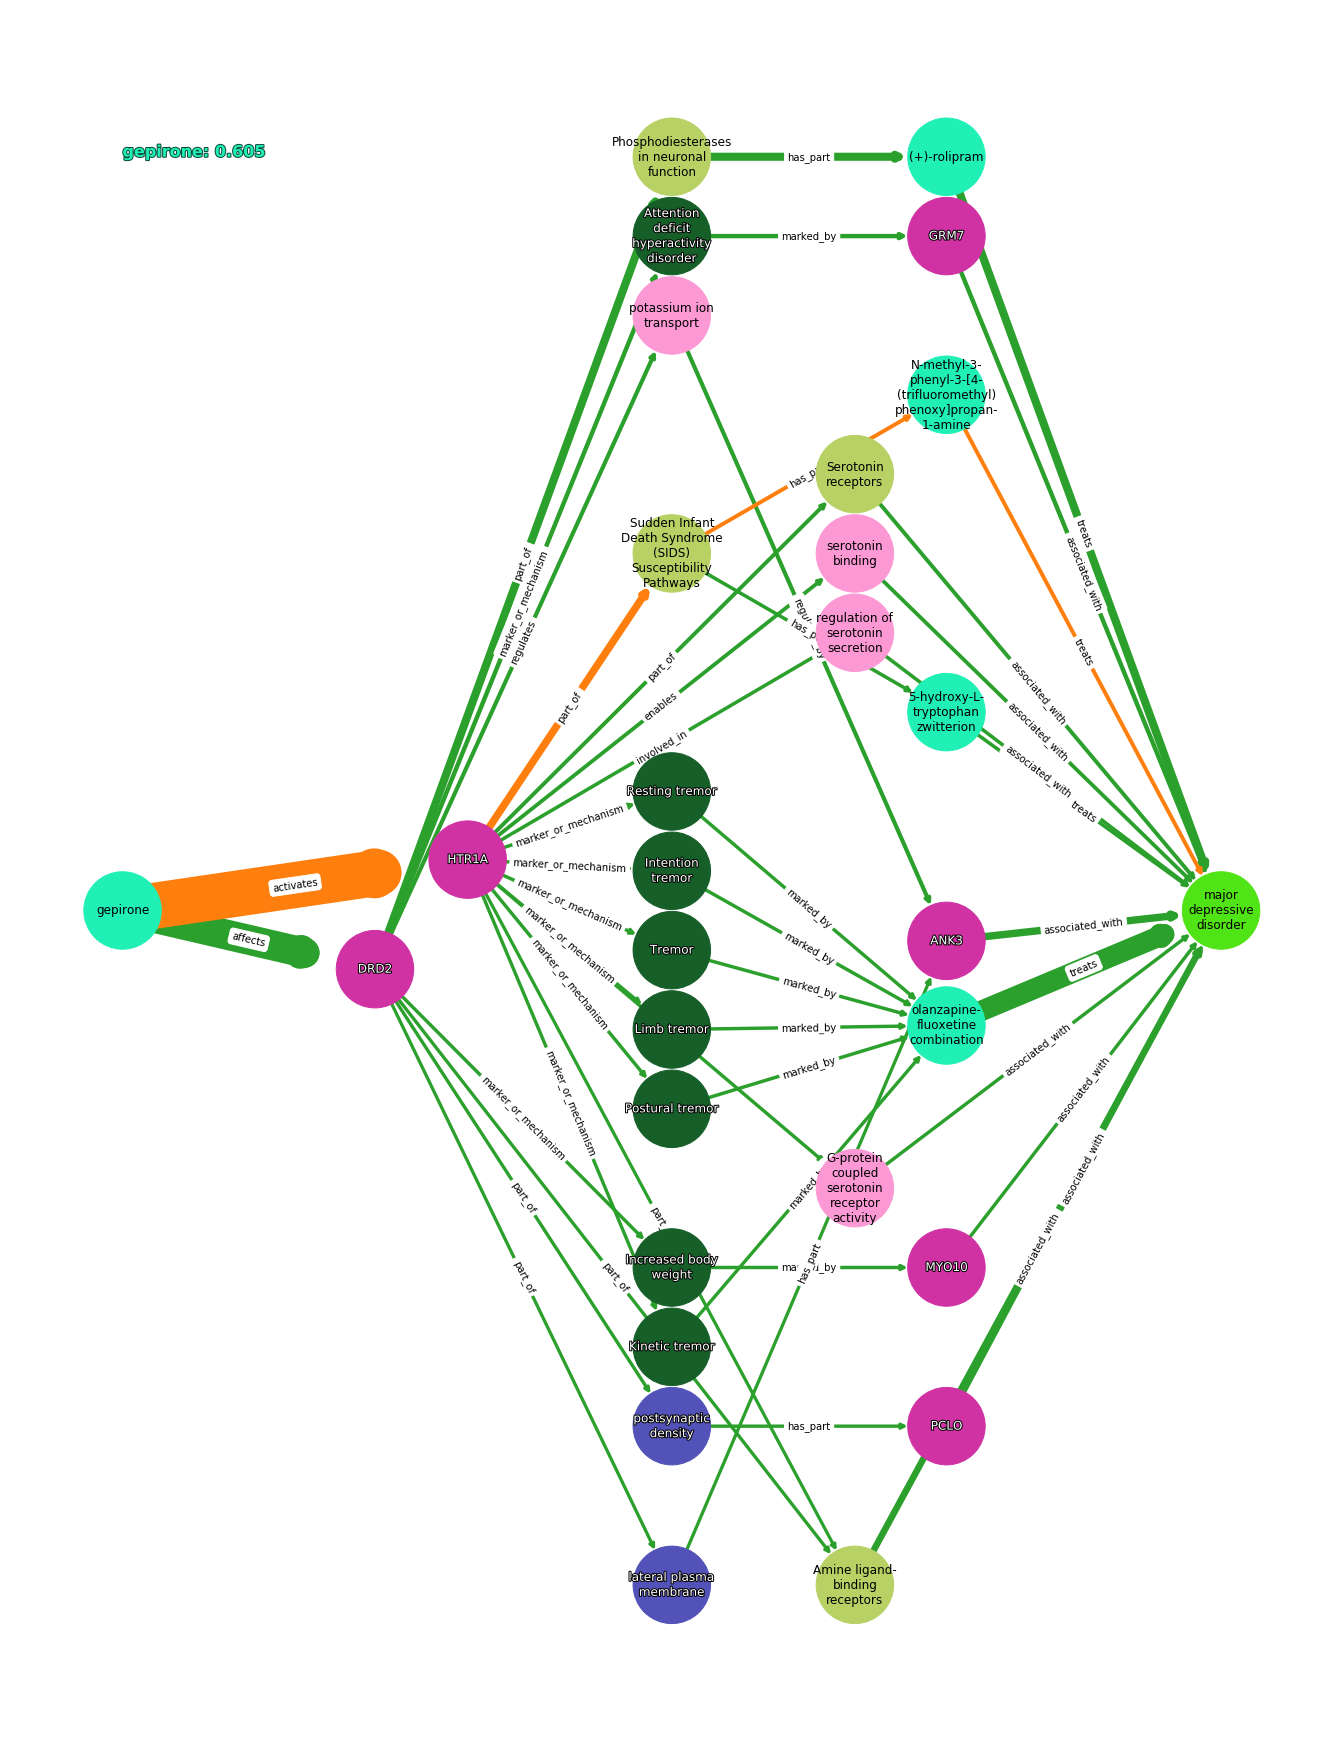

In [35]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=edge_color_map)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name, proba=.6051, n_paths=None);

### n_paths = 20 

Using the actual number of paths passed produces a figure where there is space for all the nodes

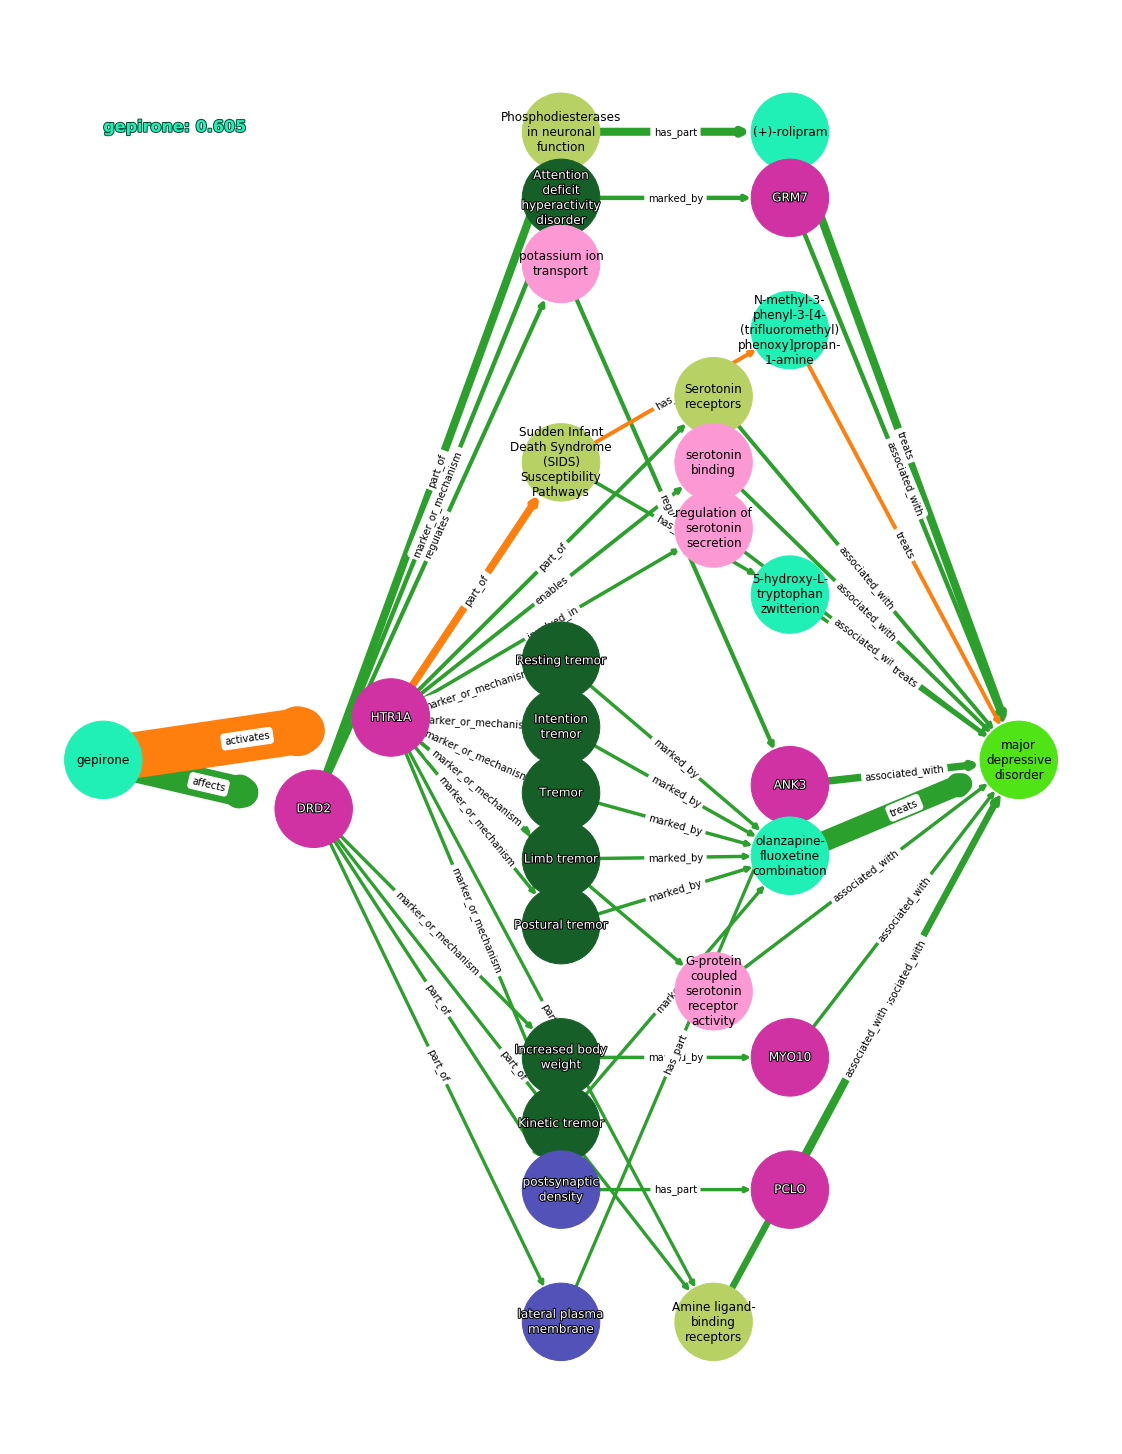

In [36]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=edge_color_map)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name, proba=.6051, n_paths=20);

### n_paths = 15 

An `n_paths` value smaller than number of paths, more compact result

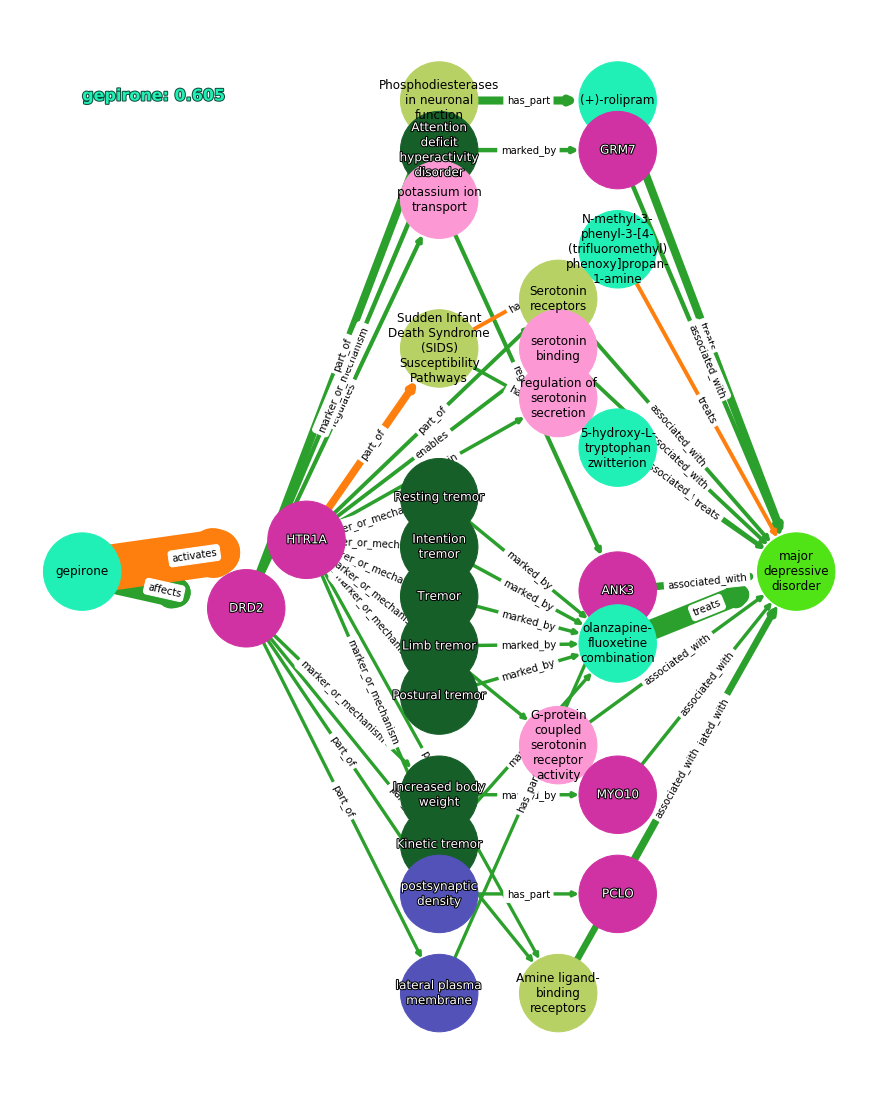

In [37]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=edge_color_map)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name, proba=.6051, n_paths=15);

# xscale

You can also scale the the width of the final figure with the `xscale` argument (default is 10)

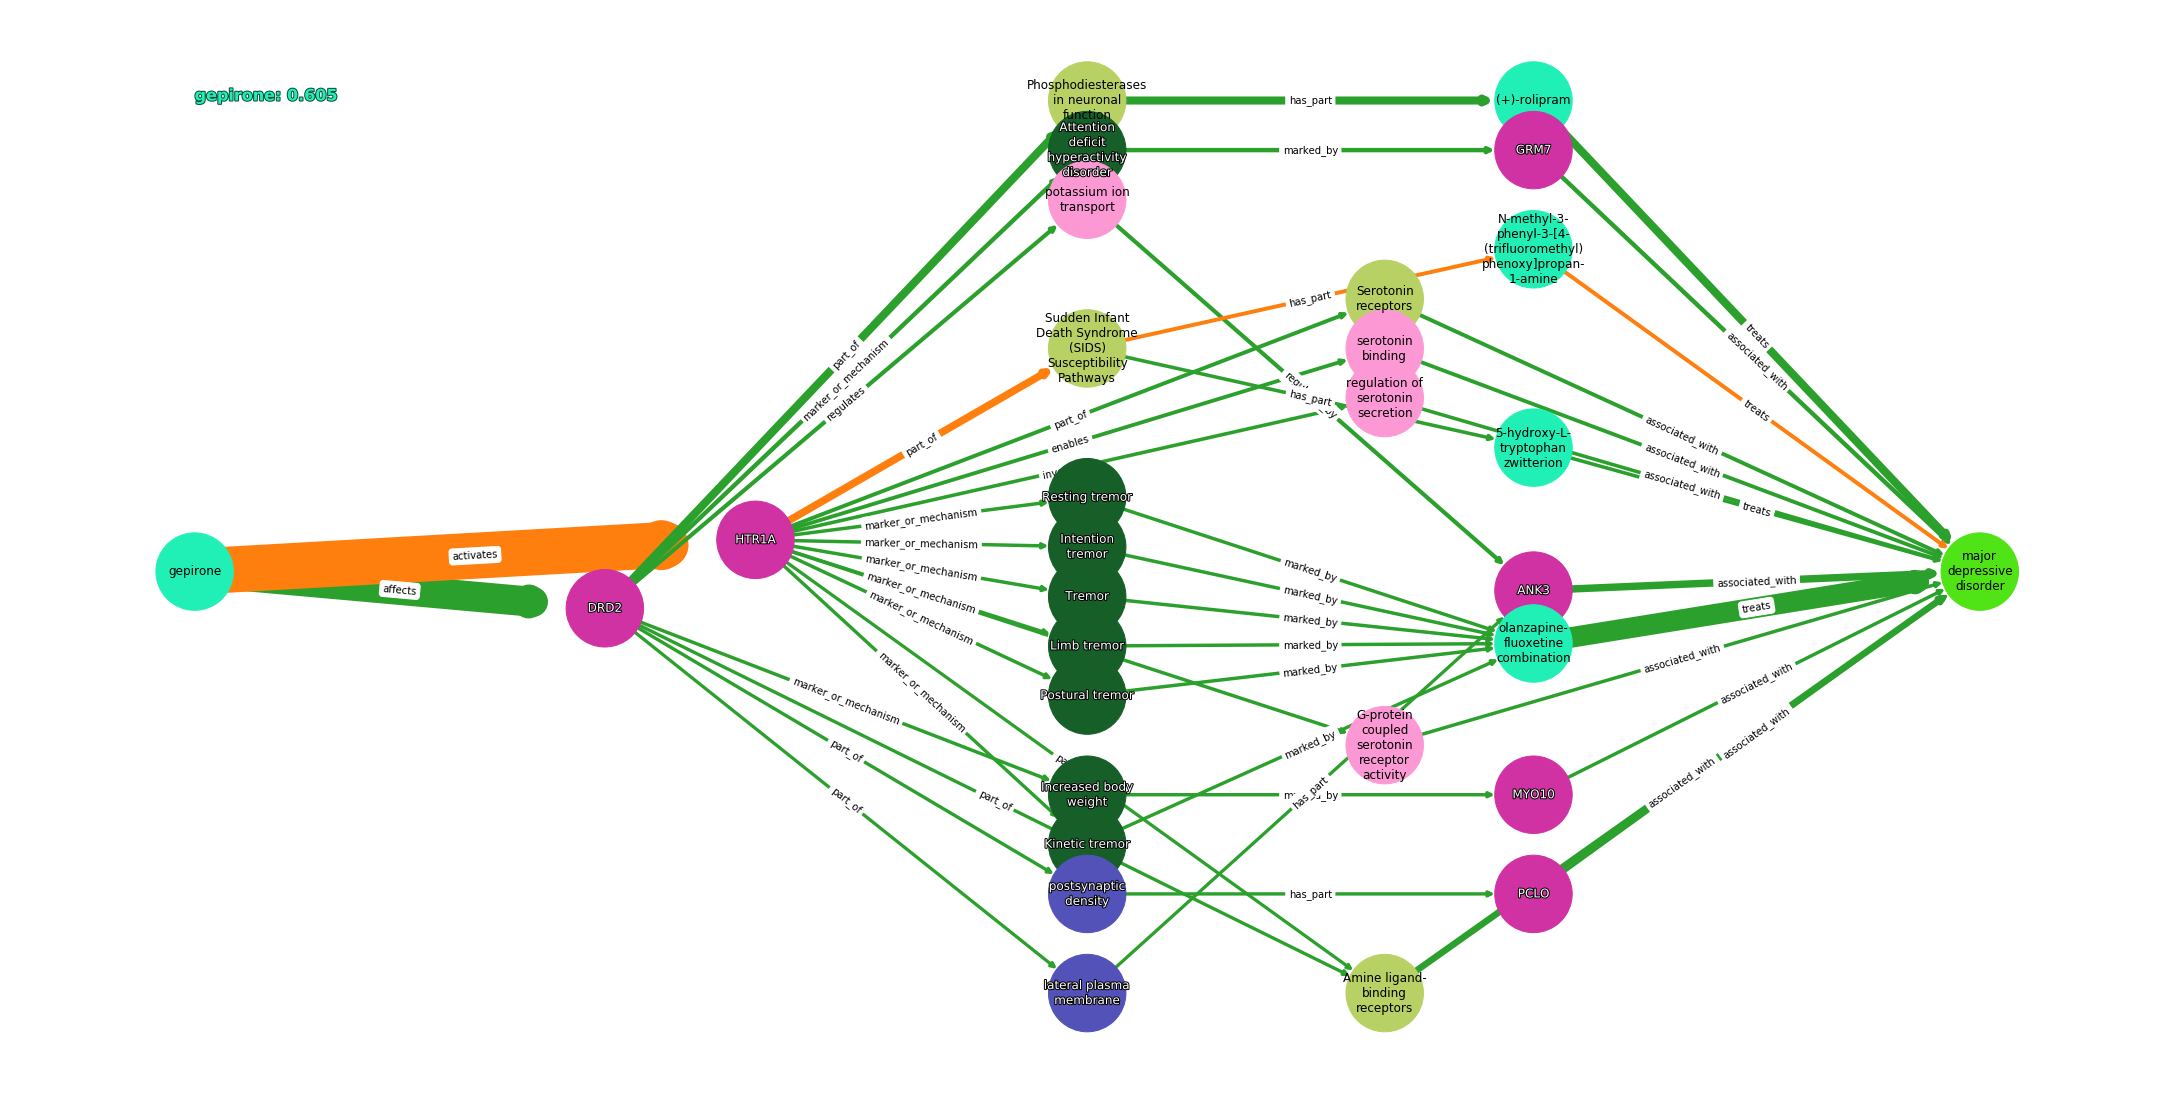

In [38]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=edge_color_map)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name, proba=.6051, n_paths=15, xscale=25);

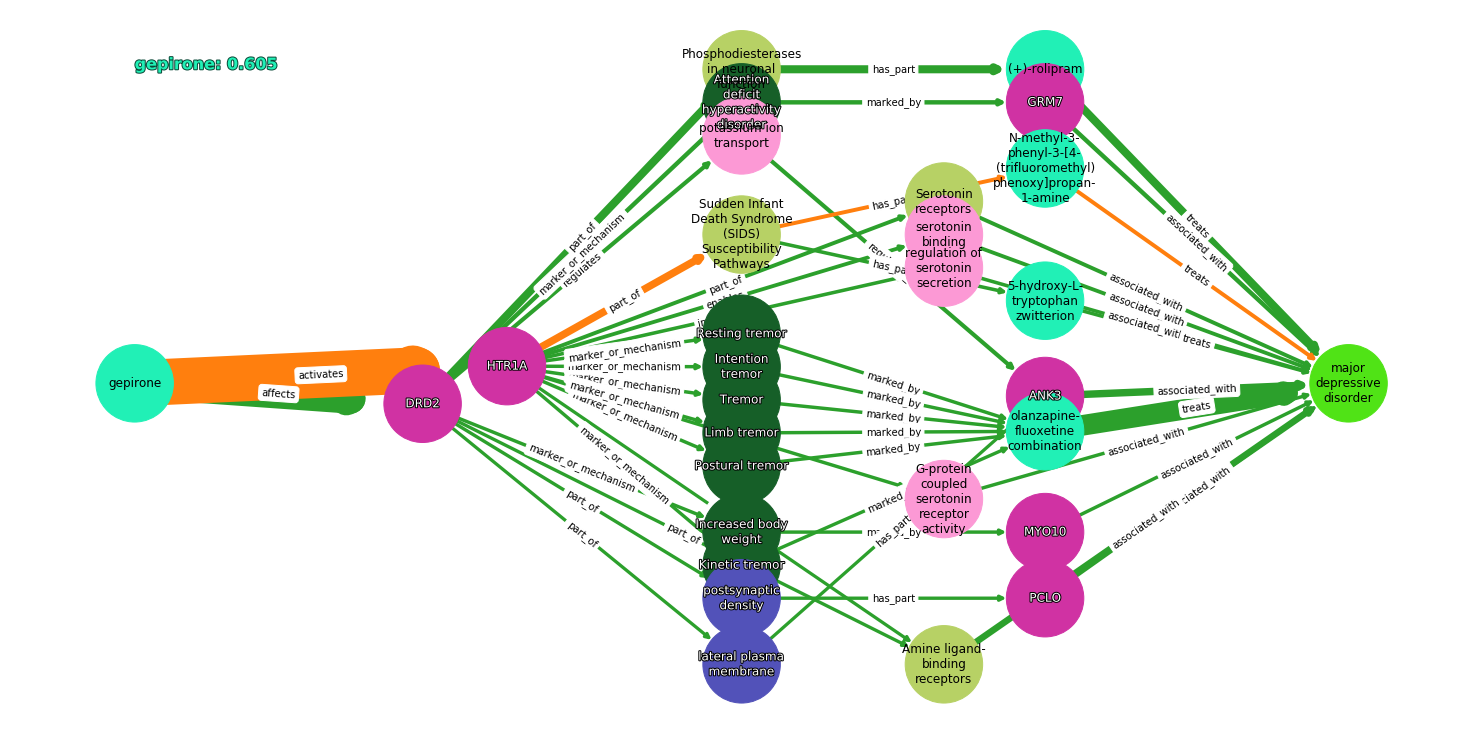

In [39]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=edge_color_map, xscale=17)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name, proba=.6051, n_paths=10, xscale=17);

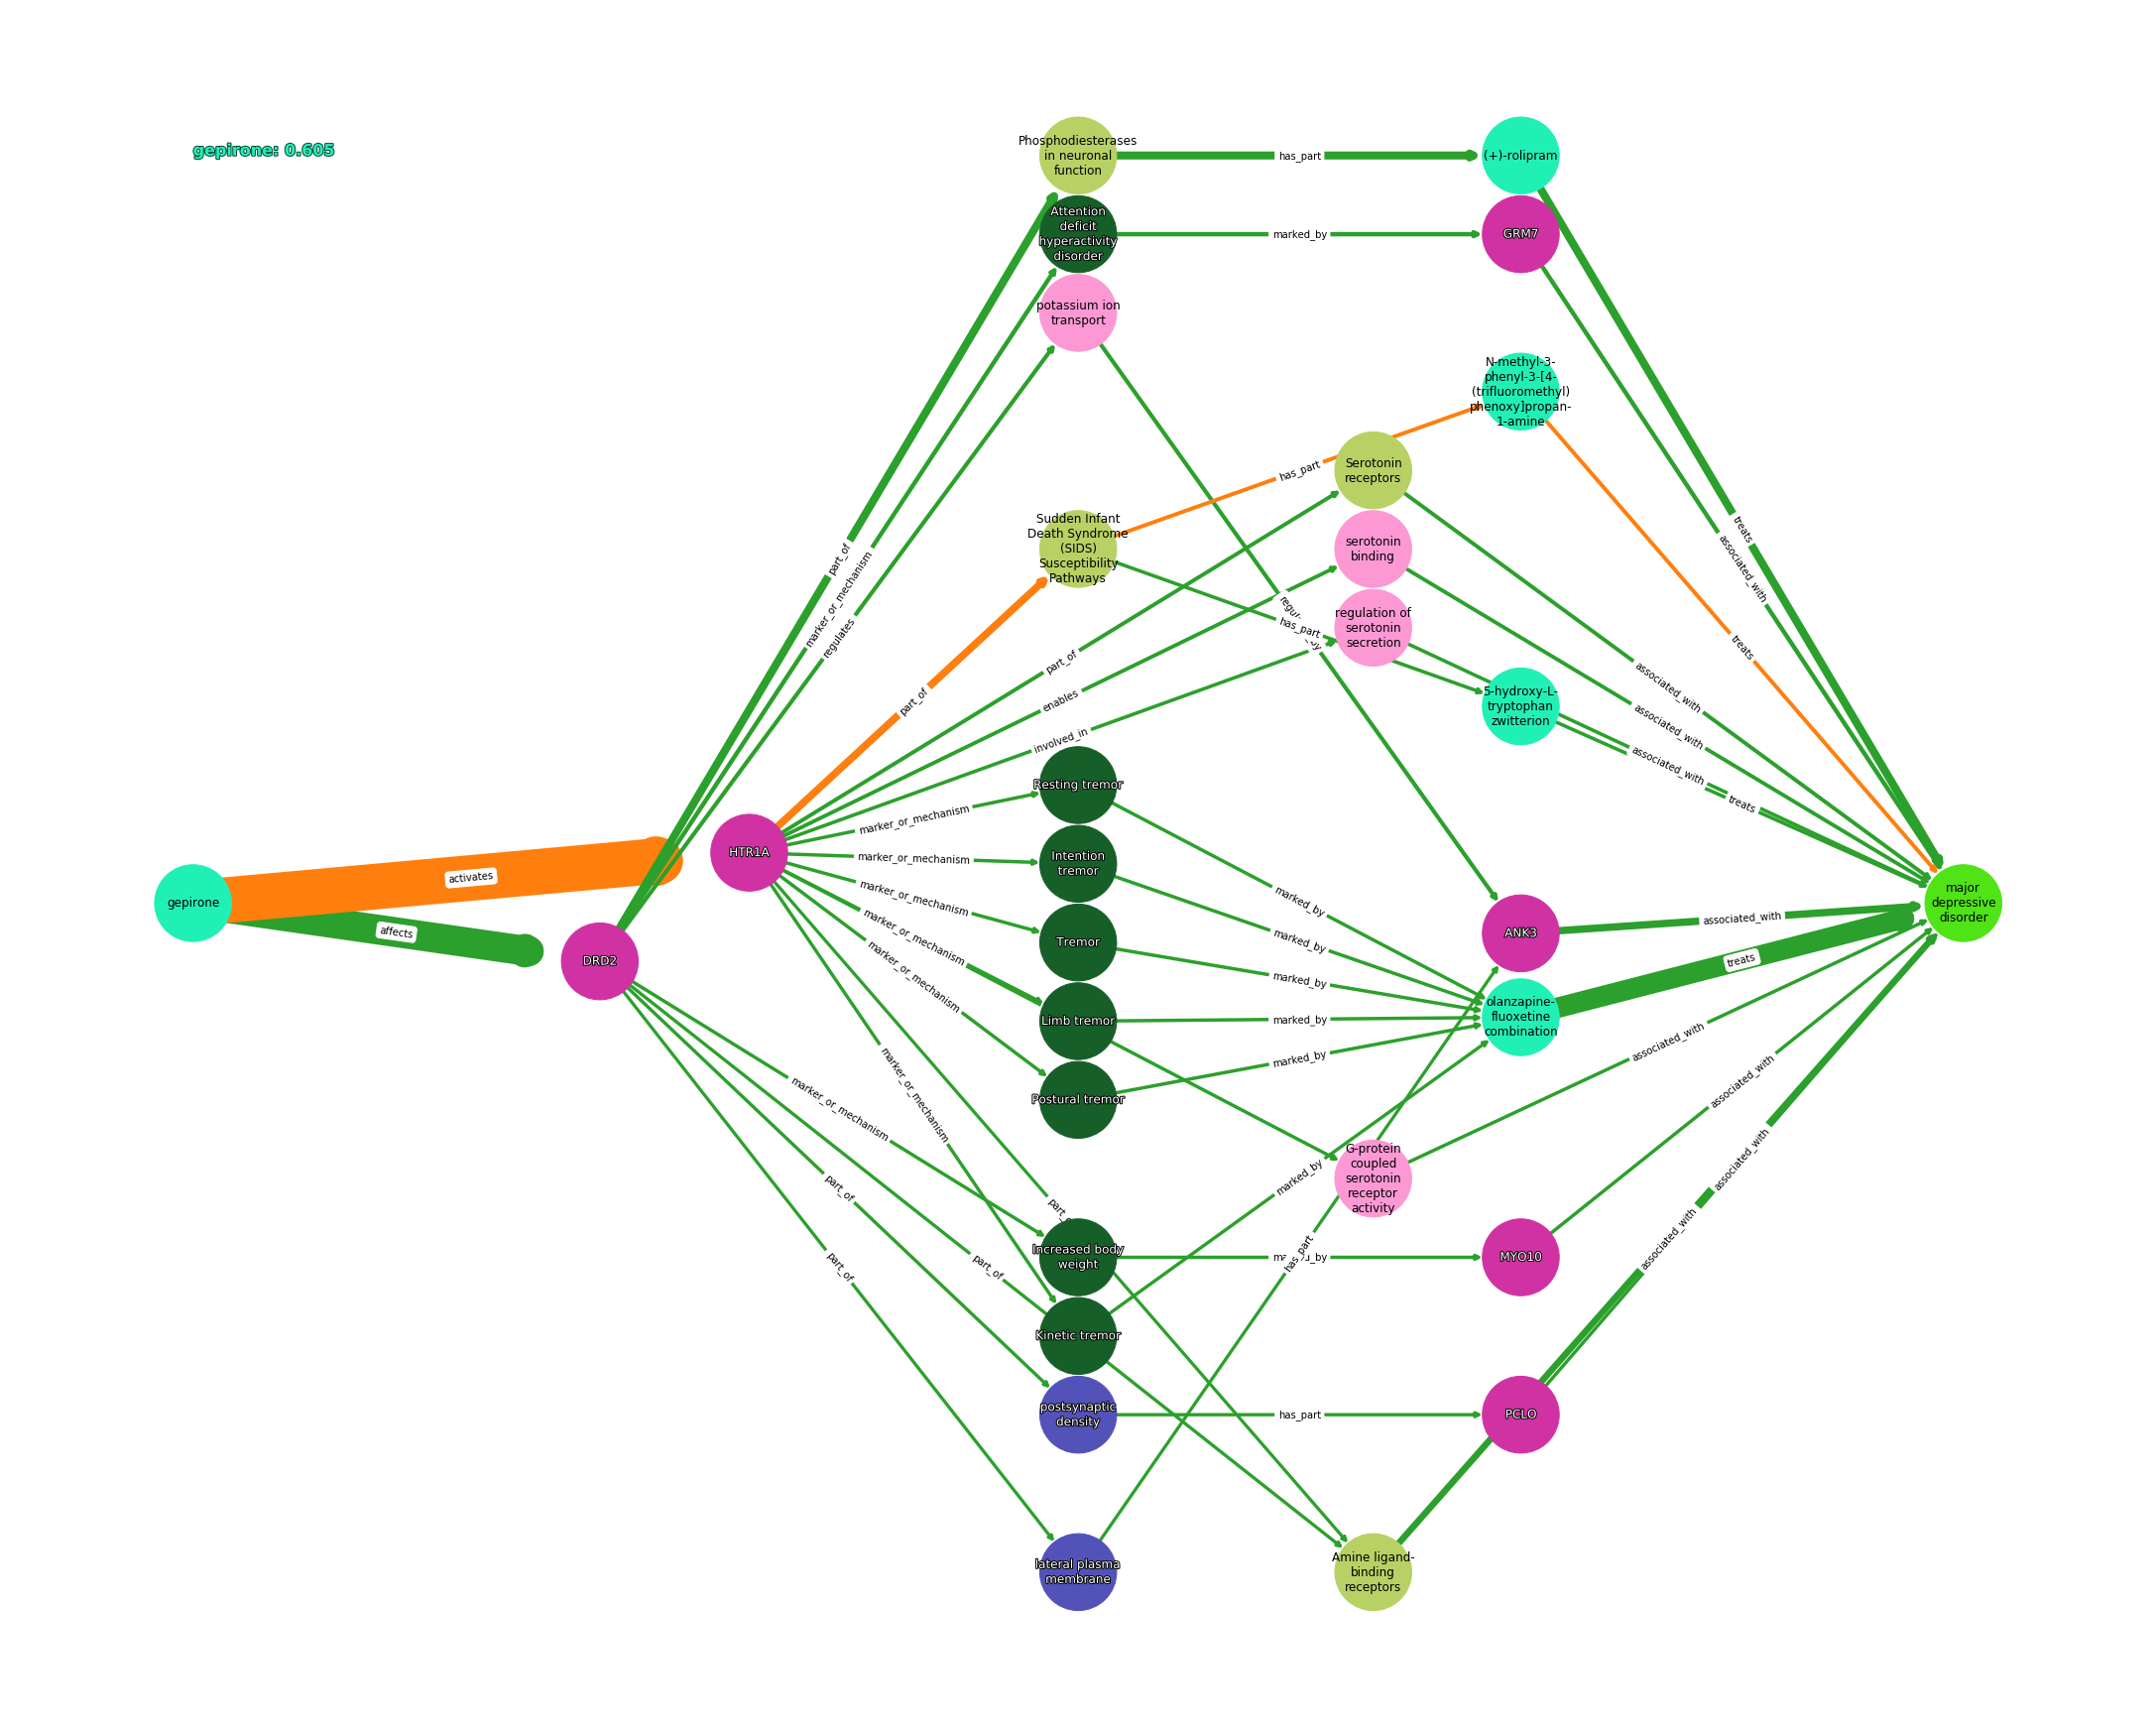

In [40]:
G = dtp.build_explanitory_graph(list_of_paths, list_of_edges, path_weights=path_weights, 
                            node_id_to_label=id_to_label, node_id_to_color=node_id_to_color, 
                            edge_id_to_color=edge_color_map)

dtp.draw_explanitory_graph(G, node_id_to_name=id_to_name, proba=.6051, xscale=25);